In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Model


In [ ]:
# Données
train_dir = "/content/drive/MyDrive/ColabNotebooks/datasets/catsDogs/train/"
test_dir = "/content/drive/MyDrive/ColabNotebooks/datasets/catsDogs/test1"

In [ ]:
images = os.listdir(train_dir+'chats')
len(images)

11965

In [ ]:
# Creating train generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.1
)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)
valid_generator= train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)

Found 11665 images belonging to 2 classes.
Found 1295 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
]

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_steps=1295//32,
                    steps_per_epoch=11665//32,
                    validation_data=valid_generator)

Epoch 1/20
364/364 [==============================] - 933s 3s/step - loss: 0.2574 - acc: 0.9232 - val_loss: 0.2440 - val_acc: 0.9250
Epoch 2/20
364/364 [==============================] - 168s 461ms/step - loss: 0.2449 - acc: 0.9245 - val_loss: 0.2235 - val_acc: 0.9258
Epoch 3/20
364/364 [==============================] - 167s 460ms/step - loss: 0.2385 - acc: 0.9271 - val_loss: 0.2238 - val_acc: 0.9273
Epoch 4/20
364/364 [==============================] - 167s 458ms/step - loss: 0.2315 - acc: 0.9282 - val_loss: 0.2180 - val_acc: 0.9305
Epoch 5/20
364/364 [==============================] - 168s 461ms/step - loss: 0.2282 - acc: 0.9280 - val_loss: 0.2299 - val_acc: 0.9289
Epoch 6/20
364/364 [==============================] - 167s 459ms/step - loss: 0.2218 - acc: 0.9303 - val_loss: 0.2107 - val_acc: 0.9320
Epoch 7/20
364/364 [==============================] - 168s 462ms/step - loss: 0.2210 - acc: 0.9294 - val_loss: 0.2207 - val_acc: 0.9305
Epoch 8/20
364/364 [==============================]

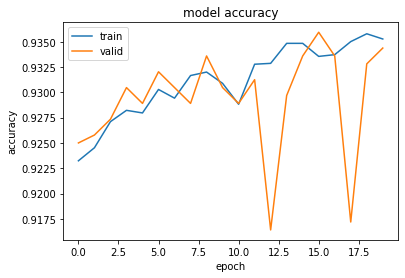

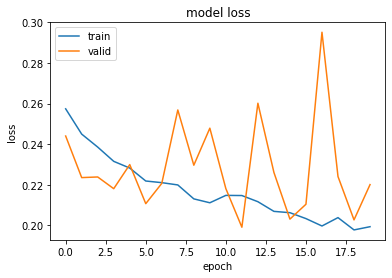

In [ ]:
# Courbe de précision
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# Courbe de perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
test_dataGen = ImageDataGenerator(1./255)

test_gen = test_dataGen.flow_from_dataframe(
    df_test,
    test_dir,
    target_size = IMG_SIZE,
    x_col = "filename",
    y_col = None,
    batch_size = batch_size,
    class_mode = None,
    shuffle = True,
    color_mode="rgb",

)

In [ ]:
predicted = model.predict(test_gen)
df_test["category"] = np.argmax(predicted, axis=-1)

In [ ]:
sample_test = df_test.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test_dir+filename, target_size=IMG_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel("{}".format(category))
plt.tight_layout()
plt.show()